# Final Project: Sustainable Energy Analysis Platform (Part 1) 

*Predicting Future Energy Efficiency and Demand in Clean Energy Transitions Using Machine Learning and Deep Learning Techniques*

- > The main objective of this project is to forecast energy generation from various renewable sources, including **solar**, **wind**, **hydroelectric**, and **biofuel** electricity. These predictions will be crucial for understanding the future trends in renewable energy, which plays an essential role in transitioning to cleaner energy solutions.

- > To achieve this, we will employ **Machine Learning** and **Deep Learning** techniques to estimate energy production based on historical data. This initial notebook focuses on **exploratory data analysis (EDA)**, where we investigate the relationships between different variables and uncover potential predictors for our final models.

## Author

### *Carlos Vergara Gámez*
Github: https://github.com/PoeMadara

Linkedin: https://www.linkedin.com/in/carlosvergaragamez/

E-mail: carlos.poemadara@gmail.com

## Source

*The dataset utilized for this research was sourced from the following reference:*

> Ritchie, H., Rosado, P., & Roser, M. (2023). *Energy*. Published online at **OurWorldinData.org**. Retrieved from: [https://ourworldindata.org/energy](https://ourworldindata.org/energy) [Online Resource]

*This resource has been invaluable in providing comprehensive data for analyzing energy trends and facilitating informed insights in my research.*


## 1. Importing Libraries
I start by importing all the necessary libraries for data manipulation, visualization, and modeling.

In [1]:
import warnings
warnings.filterwarnings("ignore")  # Suppressing warnings for cleaner output
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder  # For encoding categorical features
import geopandas as gpd  # For geospatial data processing
import folium  # For creating interactive maps
from folium import plugins  # For additional folium features

In [2]:
import os

# Create a folder called "maps" if it doesn't exist
os.makedirs('maps', exist_ok=True)

## 2. Loading and Cleaning the Raw Data
- In this section, I load the raw dataset from a CSV file. I create a copy of the DataFrame for cleaning purposes. Then, I handle missing values by filling them with zeros, which is just an example; this should be adjusted based on the specific cleaning logic you want to apply. Finally, I save the cleaned DataFrame back to a new CSV file.


In [3]:
# Load the raw file
df_raw = pd.read_csv('data/raw/owid-energy-data.csv')

df_cleaned = df_raw.copy()

# Fill null values if necessary
df_cleaned.fillna(0, inplace=True)

# Save the cleaned file
df_cleaned.to_csv('data/clean/cleaned_data_final.csv', index=False)

print("Cleaned file saved")

Cleaned file saved


## 3. Loading and Filtering the Clean Data
- In this step, I load the cleaned dataset from the previously saved CSV file. I then select only the most relevant columns for analysis, focusing on energy production and consumption metrics, as well as socio-economic indicators. 
- After filtering the DataFrame, I apply Label Encoding to the categorical columns (`country` and `iso_code`) to convert them into numerical format. I drop the original categorical columns afterward since they are no longer needed. 
- Finally, I generate a correlation matrix and create a heatmap to visualize the relationships between the features.


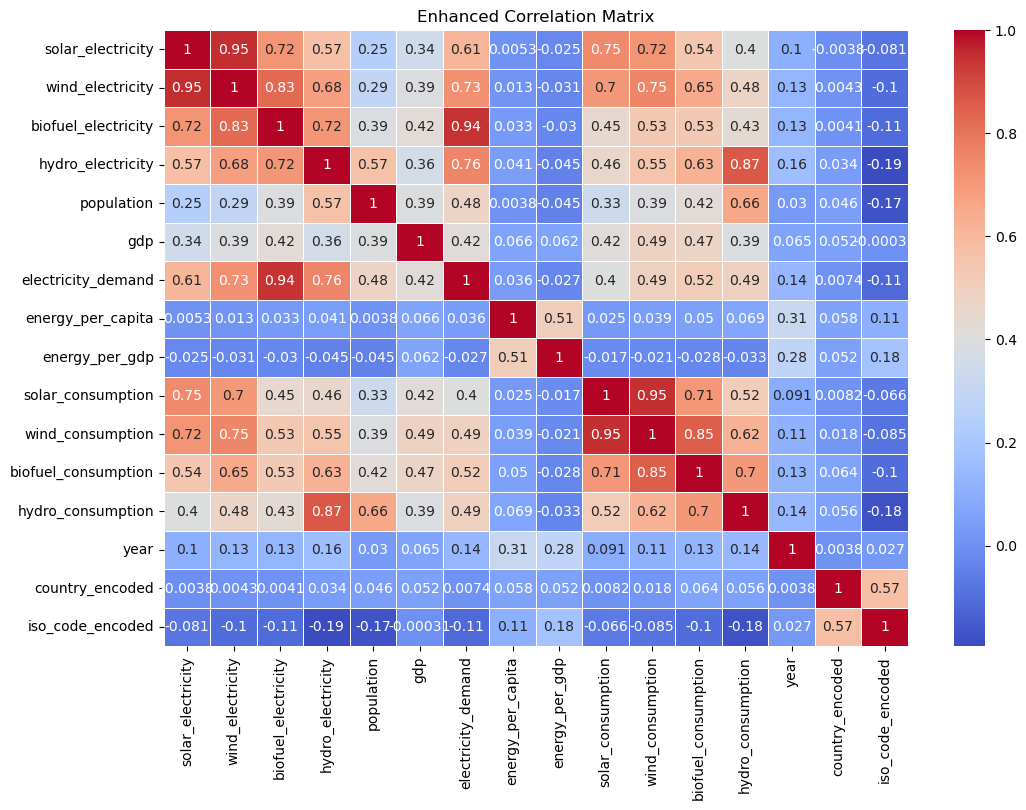

In [4]:
# Load the cleaned data
df = pd.read_csv('data/clean/cleaned_data_final.csv')

# Select only the most relevant columns
columns_to_keep = [
    'solar_electricity', 'wind_electricity', 'biofuel_electricity', 'hydro_electricity',
    'population', 'gdp', 'electricity_demand', 'energy_per_capita', 'energy_per_gdp',
    'solar_consumption', 'wind_consumption', 'biofuel_consumption', 'hydro_consumption',
    'country', 'iso_code', 'year'  # Example of categorical columns
]

df_filtered = df[columns_to_keep]

# Apply Label Encoding to categorical columns (if necessary)
le = LabelEncoder()
df_filtered['country_encoded'] = le.fit_transform(df_filtered['country'])
df_filtered['iso_code_encoded'] = le.fit_transform(df_filtered['iso_code'])

# Drop original categorical columns if no longer needed
df_filtered = df_filtered.drop(columns=['country', 'iso_code'])

# Generate the correlation matrix
corr_matrix = df_filtered.corr()

# Create a heatmap of the correlation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Enhanced Correlation Matrix")
plt.show()

1. **High correlation among renewable energies**: There is a strong positive relationship between solar, wind, and biofuel energy production.
2. **Electricity demand and renewables**: Electricity demand is highly correlated with the production of renewable energy.
3. **Energy consumption with renewables**: Energy consumption shows a positive correlation with renewable energy production, indicating that higher renewable output often leads to increased energy use.


## 4. Analyzing Energy Consumption by Country
- In this section, I focus on the renewable energy consumption columns. I first group the data by country and sum the consumption values for each type of energy source. 
- I then calculate the total energy consumption for each country by summing the individual consumption columns. 
- Finally, I filter the top 10 countries with the highest total consumption and visualize this data using a horizontal stacked bar chart, which provides a clear comparison of energy consumption across different countries.


<Figure size 1500x1000 with 0 Axes>

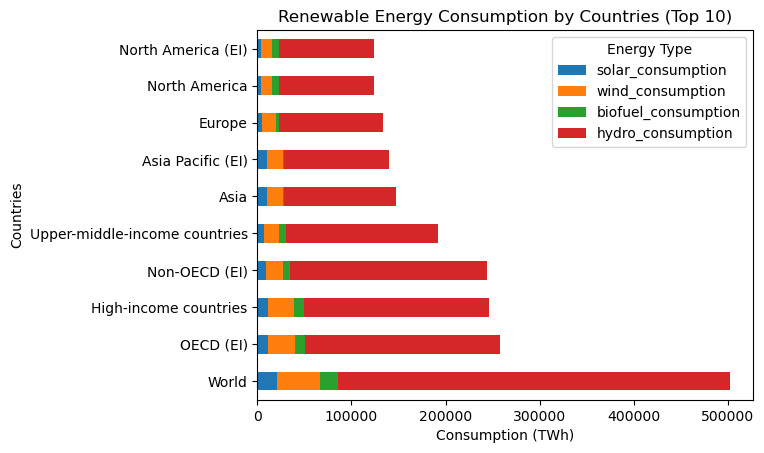

In [5]:
# Consumption columns
consumo_columns = ['solar_consumption', 'wind_consumption', 'biofuel_consumption', 'hydro_consumption']

# Sum consumption by country
df_consumo = df.groupby('country')[consumo_columns].sum().reset_index()

# Calculate total energy consumption for each country
df_consumo['total_consumption'] = df_consumo[consumo_columns].sum(axis=1)

# Filter top countries with highest total consumption (e.g., top 10)
df_top_countries = df_consumo.nlargest(10, 'total_consumption')

# Style: Horizontal Bar Chart
plt.figure(figsize=(15, 10))
df_top_countries.set_index('country')[consumo_columns].plot(kind='barh', stacked=True)
plt.title('Renewable Energy Consumption by Countries (Top 10)')
plt.xlabel('Consumption (TWh)')
plt.ylabel('Countries')
plt.legend(title='Energy Type')
plt.show()


Renewable Energy Consumption by Country (Top 10)

Bar Chart Analysis

- Dominance of Hydroelectric Power: Hydroelectric energy is the most consumed renewable energy source across all regions and globally.
- Growth of Solar and Wind Energy: There is an increase in the consumption of solar and wind energy.
- Regional Variations: Consumption patterns vary significantly between regions.

Summary

The chart highlights the global dependence on hydroelectricity and the growing role of solar and wind energy.

## 5. Plotting Renewable Electricity Trends
- This section focuses on visualizing the trends of renewable electricity sources and electricity demand over time. 
- First, I load the cleaned dataset and define the specific columns to plot, which include various types of renewable electricity and electricity demand.
- I filter the dataset to include only the data from the year 1960 onwards.
- The data is then grouped by year, and the mean values for the specified columns are calculated. 
- Finally, I create a line plot to illustrate the evolution of renewable electricity and electricity demand, enhancing the visualization with titles, labels, and gridlines for clarity.

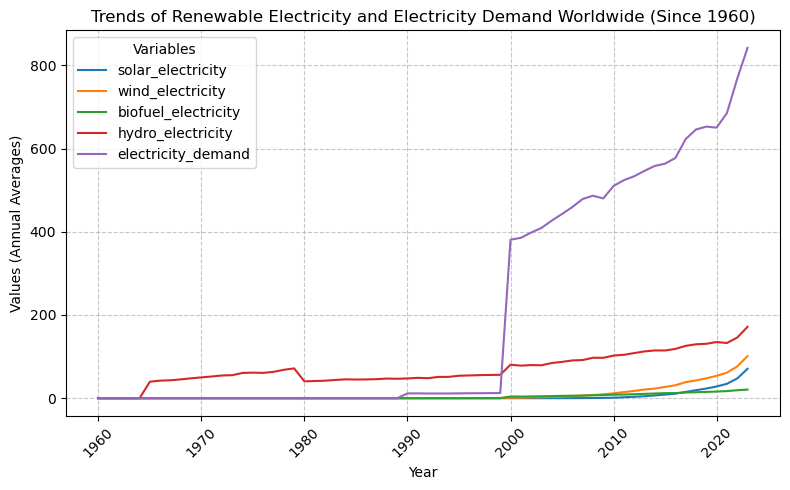

In [6]:
# Load cleaned data
df = pd.read_csv('data/clean/cleaned_data_final.csv')

# Define columns to plot
columns_to_plot = [
    'solar_electricity', 
    'wind_electricity', 
    'biofuel_electricity', 
    'hydro_electricity',
    'electricity_demand'
]

# Filter data from 1960 onwards
df_filtered = df[df['year'] >= 1960]

# Group by year and calculate mean
df_plot_grouped = df_filtered.groupby('year')[columns_to_plot].mean().reset_index()

# Line plot
plt.figure(figsize=(8, 5))
for column in columns_to_plot:
    plt.plot(df_plot_grouped['year'], df_plot_grouped[column], label=column)

# Improve visualization
plt.title('Trends of Renewable Electricity and Electricity Demand Worldwide (Since 1960)')
plt.xlabel('Year')
plt.ylabel('Values (Annual Averages)')  # Specify that these are mean annual values
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)  # Adjust y-axis label size
plt.legend(title='Variables', fontsize=10)  # Title for the legend
plt.grid(True, linestyle='--', alpha=0.7)  # Improve grid visibility

plt.tight_layout()  # Adjust layout to prevent overlap of elements
plt.show()



* **Overall increasing trend in renewable electricity:** The graph shows a clear upward trend in the production of solar, wind, biofuel, and hydroelectric electricity over the years. This indicates a growing global reliance on renewable energy sources.
* **Dominance of hydroelectric power:** Hydroelectric power has been the most significant contributor to renewable electricity generation for a long time. However, solar and wind energy have shown substantial growth in recent decades. 
* **Growing electricity demand:** The purple line representing total electricity demand also shows a consistent upward trend, suggesting a growing global need for energy. This trend highlights the importance of increasing renewable energy production to meet rising energy demands. 

## 6. Creating an Interactive World Map of Renewable Energy
- In this section, I group the filtered data by country and calculate the mean values for the specified columns related to renewable energy.
- I replace "United States" with "United States of America" to ensure consistency when merging with the world shapefile.
- After loading the world shapefile, I merge it with the aggregated DataFrame to combine geographical and energy consumption data.
- I create a base map using Folium, then add choropleth layers for each type of renewable energy, using a color scale based on the average values from the DataFrame.
- The final map includes dynamic legends and controls for the different energy types, and is saved as an interactive HTML file for visualization.

In [7]:
# Group and calculate mean for desired columns
df_grouped = df_filtered.groupby(['country'])[columns_to_plot].mean().reset_index()

# Replace "United States" with "United States of America"
df_grouped['country'] = df_grouped['country'].replace('United States', 'United States of America')

# Load world shapefile
world = gpd.read_file('shapefiles/ne_110m_admin_0_countries.shp')

# Merge DataFrame with the map using 'ADMIN' column
world = world.merge(df_grouped, how="left", left_on="ADMIN", right_on="country")

# Create base map
m = folium.Map(location=[20, 0], zoom_start=2)

# Add layers for each type of energy
for column in columns_to_plot:
    # Define color scale based on unique values of each column
    folium.Choropleth(
        geo_data=world,
        name=column,
        data=df_grouped,
        columns=['country', column],
        key_on='feature.properties.ADMIN',
        fill_color='YlGn',  # Change to other color schemes if necessary
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f'Average {column.replace("_", " ").title()}',  # Dynamic legend
        missing_kwds={"color": "lightgrey", "label": "No data"},
        # Adding the color range
        threshold_scale=df_grouped[column].quantile([0, 0.25, 0.5, 0.75, 1]).tolist()
    ).add_to(m)

# Add layer controls
folium.LayerControl().add_to(m)

# Show map
m.save('maps/seap_interactive_world_map_seap.html')

**NOTE:**  You can see this map on the repository!

## 7. Creating an Interactive Map of European Countries
- In this section, I define a list of European countries to filter the dataset specifically for Europe.
- I filter the GeoDataFrame to include only the countries in Europe, ensuring that the geographical context is limited to the desired region.
- A base map is created, centered on Europe, to enhance the visualization of energy data across the selected countries.
- I add choropleth layers for each specified type of renewable energy, visualizing the average values of energy consumption across the European countries in the list.
- Layer controls are incorporated to enable users to switch between different energy types, enhancing the interactivity of the map.
- Finally, the map is saved as an HTML file for easy access and interactive viewing.

In [8]:
list_of_european_countries = [
    'Germany', 'France', 'United Kingdom', 'Italy', 'Spain', 'Netherlands', 
    'Belgium', 'Sweden', 'Austria', 'Denmark', 'Finland', 'Norway', 'Poland', 
    'Portugal', 'Czech Republic', 'Hungary', 'Greece', 'Ireland', 'Romania', 
    'Switzerland', 'Bulgaria', 'Slovakia', 'Croatia', 'Lithuania', 'Slovenia', 
    'Latvia', 'Estonia', 'Cyprus', 'Malta'
]

# Filter the GeoDataFrame to get only Europe
eu_df = world[world['NAME'].isin(list_of_european_countries)]

# Create a base map centered on Europe
m = folium.Map(location=[50, 10], zoom_start=4)

# Add the Choropleth for European countries
for column in columns_to_plot:
    folium.Choropleth(
        geo_data=eu_df,
        name=column,
        data=eu_df,
        columns=['country', column],
        key_on='feature.properties.NAME',
        fill_color='YlGn',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f'Average {column.replace("_", " ").title()}',
        missing_kwds={"color": "lightgrey", "label": "No data"},
    ).add_to(m)

# Add layer controls
folium.LayerControl().add_to(m)

# Show the map
m.save('maps/seap_interactive_european_map.html')

**NOTE:**  You can see this map on the repository!

## 8. More Data Visualizations
- In this section, I create some visualizations to analyze trends in energy consumption and production over time.
- The first visualization shows the trends of different types of electricity generation (solar, wind, hydro, and biofuel) over the years.
- The second visualization presents a bar chart comparing electricity demand and generation annually, highlighting their relationship and trends.

In [9]:
df = pd.read_csv('data/clean/cleaned_data_final.csv')

# Filter the DataFrame to include data from 1960 onwards
df_filtered = df[df['year'] >= 1960]

### 8.1 Energy Trends Over Time

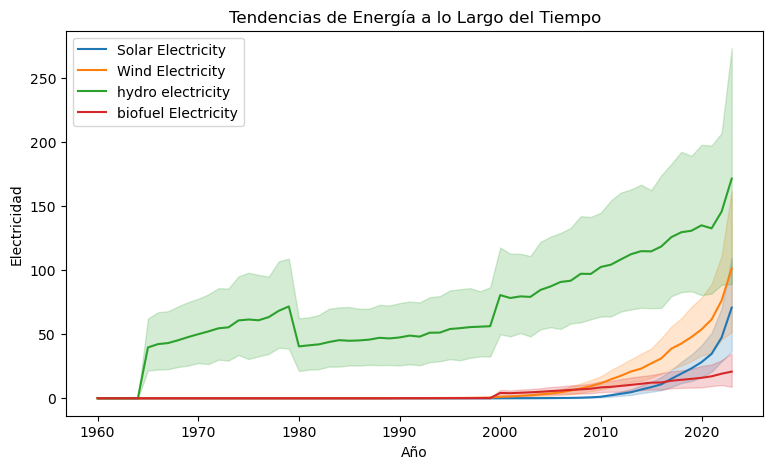

In [10]:
# Tendencias de energía a lo largo del tiempo
plt.figure(figsize=(9, 5))
sns.lineplot(data=df_filtered, x='year', y='solar_electricity', label='Solar Electricity')
sns.lineplot(data=df_filtered, x='year', y='wind_electricity', label='Wind Electricity')
sns.lineplot(data=df_filtered, x='year', y='hydro_electricity', label='hydro electricity')
sns.lineplot(data=df_filtered, x='year', y='biofuel_electricity', label='biofuel Electricity')
plt.title('Tendencias de Energía a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Electricidad')
plt.legend()
plt.show()

- > **Outcome:** The most striking trend observed in the graph is the exponential growth of solar and wind electricity generation. In contrast, hydroelectric and biofuel electricity sources have shown more modest growth or even slight declines. This suggests a clear shift towards renewable energy sources, particularly solar and wind power, in recent decades.

### 8.2 Electricity Demand and Generation Over Years

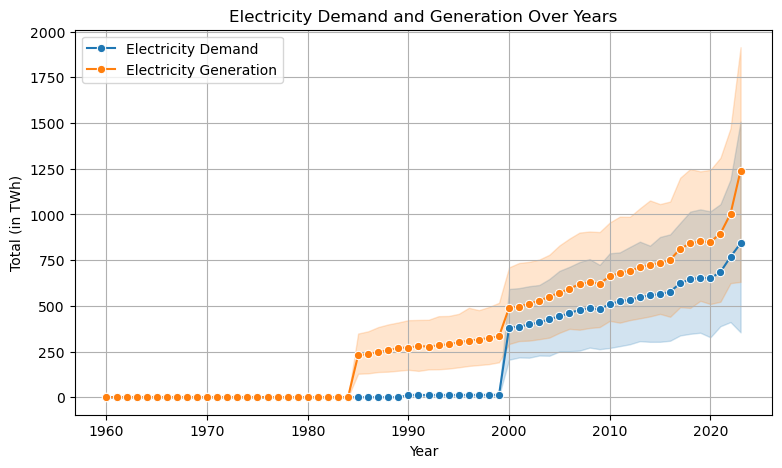

In [11]:
plt.figure(figsize=(9, 5))
sns.lineplot(data=df_filtered, x='year', y='electricity_demand', label='Electricity Demand', marker='o')
sns.lineplot(data=df_filtered, x='year', y='electricity_generation', label='Electricity Generation', marker='o')
plt.title('Electricity Demand and Generation Over Years')
plt.xlabel('Year')
plt.ylabel('Total (in TWh)')
plt.legend()
plt.grid()
plt.show()



- > **Outcome:**  The graph shows a substantial increase in electricity demand and generation over several decades, particularly around the year 2000. This period marks a strong correlation between the two metrics, indicating a simultaneous rise in demand and generation.

## 10. Next Step

Now that we've completed the initial analysis and visualization, it's time to move on to the second part of the project. 

We'll delve into **Machine Learning and Deep Learning** techniques to further enhance our findings and predictions. 

You can access this section in the following notebook:

[SEAP_02_Machine_Learning_and_Deep_Learning.ipynb](SEAP_02_Machine_Learning_and_Deep_Learning.ipynb)



---